<a href="https://colab.research.google.com/github/cjsdudwls1/Aflatoxin_analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EC%9A%B4%EC%82%AC%EC%9D%B4%EC%A7%95%2Bdata_split%2B%EC%97%AC%EB%9F%AC_smote_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ÏÇ¨Ïö©Îêú Í∏∞ÏÉÅÌï≠Î™©
- tmprt_150	Í∏∞Ïò®(150CM)
- tmprt_150Top	Í∏∞Ïò®(150CM)ÏµúÍ≥†
- tmprt_150Lwet	Í∏∞Ïò®(150CM)ÏµúÏ†Ä
- hd_150	ÏäµÎèÑ(150CM)
- arvlty_300	ÌíçÏÜç(300CM)
- arvlty_300Top	ÏµúÎåÄÌíçÏÜç(300CM)
- afp	Í∞ïÏàòÎüâ
- sunshn_Time	ÏùºÏ°∞ÏãúÍ∞Ñ
- solrad_Qy	ÏùºÏÇ¨Îüâ
- soil_Mitr_10	ÌÜ†ÏñëÏàòÎ∂Ñ(10CM)

### Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞©Î≤ï
- ÌÜµÌï©_LIMSÏóêÏÑú Í∞Å Í±¥Ïóê ÎåÄÌï¥ Ï£ºÏÜåÏóê ÏùòÌï¥ (ÏúÑÎèÑ, Í≤ΩÎèÑ) Ï†ïÎ≥¥ apiÏóêÏÑú Ï°∞Ìöå
- Ìï¥Îãπ Ï£ºÏÜåÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉÅÏÑ∏ -> ÎÑìÏùÄ Î≤îÏúÑÎ°ú ÎÑìÌòÄÍ∞ÄÎ©¥ÏÑú Ï°∞Ìöå
- Ìï¥Îãπ (ÏúÑÎèÑ, Í≤ΩÎèÑ)ÏôÄ Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í¥ÄÏ∏°ÏÜåÎ•º Ï∞æÏïÑ Ìï¥ÎãπÏùº Í∏∞Ï§Ä Í≥ºÍ±∞ 30Ïùº ÏÉÅÍ∏∞ Í∏∞ÏÉÅÌï≠Î™©ÏùÑ record ÌòïÌÉúÎ°ú ÎßåÎì¶
- ÌòπÏãú ÌïÑÏöîÌï†ÏßÄ Î™∞Îùº XÏóê Ïù¥Îü∞ Ìï≠Î™©ÎèÑ Ï∂îÍ∞ÄÌñàÏùå
    - INSPCT_PURPS_NAME
    - INSPCT_KND_NAME
    - PRDLST_NM
    - SPLORE_STTUS_NAME
    - ORGPLCE_NATION_CODE

### Îç∞Ïù¥ÌÑ∞ ÏùΩÎäî Î∞©Î≤ï
df_ÌÜµÌï©_LIMS_Í∏∞ÏÉÅÏ†ïÎ≥¥_Í≤∞Ìï©_y = pd.read_pickle('../results/df_ÌÜµÌï©_LIMS_Í∏∞ÏÉÅÏ†ïÎ≥¥_Í≤∞Ìï©_gzip_y.pkl', compression='gzip')
df_ÌÜµÌï©_LIMS_Í∏∞ÏÉÅÏ†ïÎ≥¥_Í≤∞Ìï©_X = pd.read_pickle('../results/df_ÌÜµÌï©_LIMS_Í∏∞ÏÉÅÏ†ïÎ≥¥_Í≤∞Ìï©_gzip_X.pkl', compression='gzip')

In [ ]:
# !pip install tensorflow -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install xgboost

In [ ]:
import pandas as pd

def summarize(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values (%)'] = (df.isnull().sum() / len(df)) * 100

    # Get sample values, up to 10
    def get_sample_values(series):
        non_null_values = series.dropna().unique()
        if len(non_null_values) > 10:
            return non_null_values[:10].tolist()
        else:
            return non_null_values.tolist()

    # Collect sample values for each column
    sample_values_list = [get_sample_values(df[col]) for col in df.columns]
    summary['Sample Values'] = sample_values_list

    return summary

# **1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï†ÑÏ≤òÎ¶¨**
### ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏûÑÌï®ÏùÄ Ï†úÍ±∞
### Í∞ÄÍ≥µÏãùÌíà Îç∞Ïù¥ÌÑ∞Îßå Î∂ÑÏÑùÎåÄÏÉÅÏúºÎ°ú

In [ ]:
import pandas as pd
import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
# from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# --- 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Î°úÎìú ---
X_df = pd.read_pickle('/content/drive/MyDrive/·Ñâ·Öµ·Ü®·Ñã·Ö£·Ü®·Ñé·Ö•(·Ñã·Ö°·Ñë·Ö≥·ÜØ·ÑÖ·Ö°·Ñê·Ö©·Ü®·Ñâ·Öµ·Ü´ ·ÑÄ·Ö™·Ü´·ÑÖ·Öß·Ü´ ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•)/250708_·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏ LIMS ·Ñâ·Öµ·Ñí·Ö•·Ü∑·ÑÄ·Ö•·Ü∑·Ñâ·Ö° ·ÑÄ·Öß·ÜØ·ÑÄ·Ö™(·Ñí·Ö°·Üº·ÑÜ·Ö©·Ü® ·ÑÄ·Öµ·Ñå·ÖÆ·Ü´)_·Ñã·Ö°·Ñë·Ö≥·ÜØ·ÑÖ·Ö°·Ñê·Ö©·Ü®·Ñâ·Öµ·Ü´/_·Ñí·Ö°·Ü®·Ñâ·Ö≥·Ü∏·Ñã·Ö≠·Üº ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•_/df_·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏_LIMS_·ÑÄ·Öµ·Ñâ·Ö°·Üº·Ñå·Ö•·Üº·Ñá·Ö©_·ÑÄ·Öß·ÜØ·Ñí·Ö°·Ü∏_gzip_X.pkl', compression='gzip')
y_df = pd.read_pickle('/content/drive/MyDrive/·Ñâ·Öµ·Ü®·Ñã·Ö£·Ü®·Ñé·Ö•(·Ñã·Ö°·Ñë·Ö≥·ÜØ·ÑÖ·Ö°·Ñê·Ö©·Ü®·Ñâ·Öµ·Ü´ ·ÑÄ·Ö™·Ü´·ÑÖ·Öß·Ü´ ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•)/250708_·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏ LIMS ·Ñâ·Öµ·Ñí·Ö•·Ü∑·ÑÄ·Ö•·Ü∑·Ñâ·Ö° ·ÑÄ·Öß·ÜØ·ÑÄ·Ö™(·Ñí·Ö°·Üº·ÑÜ·Ö©·Ü® ·ÑÄ·Öµ·Ñå·ÖÆ·Ü´)_·Ñã·Ö°·Ñë·Ö≥·ÜØ·ÑÖ·Ö°·Ñê·Ö©·Ü®·Ñâ·Öµ·Ü´/_·Ñí·Ö°·Ü®·Ñâ·Ö≥·Ü∏·Ñã·Ö≠·Üº ·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•_/df_·Ñê·Ö©·Üº·Ñí·Ö°·Ü∏_LIMS_·ÑÄ·Öµ·Ñâ·Ö°·Üº·Ñå·Ö•·Üº·Ñá·Ö©_·ÑÄ·Öß·ÜØ·Ñí·Ö°·Ü∏_gzip_y.pkl', compression='gzip')

In [ ]:
# Filter out rows where 'JDGMNT_WORD_NAME' is 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®'
filtered_indices_jdgmnt = y_df[y_df['JDGMNT_WORD_NAME'] != 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®'].index

X_df_filtered = X_df.loc[filtered_indices_jdgmnt]
y_df_filtered = y_df.loc[filtered_indices_jdgmnt]['JDGMNT_WORD_NAME']

# Filter out rows where 'INSPCT_KND_NAME' is 'Ï∂ïÏÇ∞Î¨º' from the already filtered dataframes
filtered_indices_knd = X_df_filtered[X_df_filtered['INSPCT_KND_NAME'] != 'Ï∂ïÏÇ∞Î¨º'].index

X_df_filtered = X_df_filtered.loc[filtered_indices_knd]
y_df_filtered  = y_df_filtered.loc[filtered_indices_knd]

print("Filtered X_df shape after removing 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®' and 'Ï∂ïÏÇ∞Î¨º':", X_df_filtered.shape)
print("Filtered y_df shape after removing 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®' and 'Ï∂ïÏÇ∞Î¨º':", y_df_filtered.shape)

X_df_filtered.head()

Filtered X_df shape after removing 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®' and 'Ï∂ïÏÇ∞Î¨º': (130341, 305)
Filtered y_df shape after removing 'ÏÉÅÍ∏∞Ïã§ÌóòÌôïÏù∏Ìï®' and 'Ï∂ïÏÇ∞Î¨º': (130341,)


INSPCT_PURPS_NAME INSPCT_KND_NAME                        PRDLST_NM  \
0          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨             NaN                               Í≥ºÏûê   
1          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨             NaN                               Í≥ºÏûê   
2          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨              ÏãùÌíà  Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏)   
3          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨              ÏãùÌíà  Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏)   
4          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨              ÏãùÌíà                               Í≥ºÏûê   

  SPLORE_STTUS_NAME ORGPLCE_NATION_CODE  tmprt_150_29  tmprt_150Top_29  \
0                ÎÉâÎèô                 NaN          -5.4              1.3   
1                ÎÉâÎèô                 NaN          -5.4              1.3   
2                Ïã§Ïò®                 NaN          -2.6              3.0   
3                Ïã§Ïò®                 NaN          -2.6              3.0   
4               NaN                 NaN          -1.8              2.7   

   tmprt_150Lwet_29  hd_150_29  arvlty_300_29  ...  tmprt_150_00  \
0             -10.6       59.3            0.3  ...          -4.8   
1             -10.6       59.3            0.3  ...          -4.8   
2              -7.6       55.9            0.7  ...          -2.9   
3              -7.6       55.9            0.7  ...          -2.9   
4              -7.4       46.9            0.5  ...          -2.5   

   tmprt_150Top_00  tmprt_150Lwet_00  hd_150_00  arvlty_300_00  \
0              1.9              -9.9       77.9            0.2   
1              1.9              -9.9       77.9            0.2   
2              5.7             -10.2       79.6            0.6   
3              5.7             -10.2       79.6            0.6   
4              4.4              -8.2       77.2            0.4   

   arvlty_300Top_00  afp_00  sunshn_Time_00  solrad_Qy_00  soil_Mitr_10_00  
0               2.8     1.0             NaN          3.99             16.1  
1               2.8     1.0             NaN          3.99             16.1  
2               6.0     0.5             NaN          6.11              NaN  
3               6.0     0.5             NaN          6.11              NaN  
4               4.2     0.0            92.0          4.73              NaN  

[5 rows x 305 columns]

In [ ]:
y_df_filtered.head()

0    Ï†ÅÌï©
1    Ï†ÅÌï©
2    Ï†ÅÌï©
3    Ï†ÅÌï©
4    Ï†ÅÌï©
Name: JDGMNT_WORD_NAME, dtype: object

## 2. LIMSÏôÄ Í∏∞ÌõÑÎç∞Ïù¥ÌÑ∞Îäî ÏõêÏ≤úÍ≥º Îç∞Ïù¥ÌÑ∞ÌòïÌÉú(timeseries, cross section data)Ïù¥Îãà Í∞ÅÍ∞Å Î∂ÑÎ¶¨ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâÌïúÎã§.

In [ ]:
X_lims = X_df_filtered.loc[:, :'ORGPLCE_NATION_CODE']
X_weather = X_df_filtered.loc[:, 'tmprt_150_29':]

In [ ]:
y_df_filtered.value_counts(normalize=True)*100

JDGMNT_WORD_NAME
Ï†ÅÌï©     99.568823
Î∂ÄÏ†ÅÌï©     0.431177
Name: proportion, dtype: float64

## 2.1. LIMS Îç∞Ïù¥ÌÑ∞(Cross-sectional Data) Ï†ÑÏ≤òÎ¶¨

### **Í≤∞Î°†Ï†ÅÏúºÎ°ú INSPCT_PURPS_NAME Ïù¥Ïô∏Îäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÏóÜÏùå**
### **Îã§Îßå Í≥ºÏ†úÎ•º ÏúÑÌï¥ÏÑú Î≥ÄÏàò 2Í∞ú(INSPCT_PURPS_NAME, PRDLST_NM)Î•º ÎÇ®ÍπÄ**

In [ ]:
summarize(X_lims)

Data Type  Unique Values  Missing Values (%)  \
INSPCT_PURPS_NAME      object              5            0.000000   
INSPCT_KND_NAME        object              1           20.745583   
PRDLST_NM              object            513            0.000000   
SPLORE_STTUS_NAME      object              4           45.320352   
ORGPLCE_NATION_CODE    object             23           99.693880   

                                                         Sample Values  
INSPCT_PURPS_NAME                   [ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨, ÏàòÍ±∞Í≤ÄÏÇ¨, ÌíàÏßàÍ≤ÄÏÇ¨, Í∏∞ÌÉÄ, Î™®ÎãàÌÑ∞ÎßÅÍ≤ÄÏÇ¨]  
INSPCT_KND_NAME                                                   [ÏãùÌíà]  
PRDLST_NM            [Í≥ºÏûê, Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏), ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥º...  
SPLORE_STTUS_NAME                                    [ÎÉâÎèô, Ïã§Ïò®, ÎÉâÏû•, ÏôÑÏ†úÌíà]  
ORGPLCE_NATION_CODE  [Íµ≠ÏÇ∞, ÎåÄÌïúÎØºÍµ≠, Î≤†Ìä∏ÎÇ®, ÌïúÍµ≠, Ï§ëÍµ≠, 2023-05-20, The United...

In [ ]:
# Í≤∞Ï∏°Î•†Ïù¥ ÎßéÏùÄ Î≥ÄÏàòÎäî Ï†úÍ±∞
X_lims = X_lims.drop(columns=['INSPCT_KND_NAME', 'ORGPLCE_NATION_CODE', 'SPLORE_STTUS_NAME'])

print("X_lims shape after dropping specified columns:", X_lims.shape)
display(X_lims.head())

X_lims shape after dropping specified columns: (130341, 2)


INSPCT_PURPS_NAME                        PRDLST_NM
0          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨                               Í≥ºÏûê
1          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨                               Í≥ºÏûê
2          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨  Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏)
3          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨  Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏)
4          ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨                               Í≥ºÏûê

In [ ]:
# Filter PRDLST_NM values with length >= 10
X_df_filtered[X_df_filtered['PRDLST_NM'].str.len() >= 10]['PRDLST_NM'].value_counts()

PRDLST_NM
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•òÍ∞ÄÍ≥µÌíà                        42177
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•ò Í∞ÄÍ≥µÌíà                        8270
ÎÇòÌÜ†Í∑†Î∞∞ÏñëÎ∂ÑÎßê(Ï†ú2013-6Ìò∏)                     188
ÏÑùÎ•òÎÜçÏ∂ïÎ∂ÑÎßê(Ï†ú2018-8Ìò∏)                      160
HKÌëúÍ≥†Î≤ÑÏÑØÍ∑†ÏÇ¨Ï≤¥(Ï†ú2010-35Ìò∏)                  154
                                    ...  
Î†àÎ™¨Î≤ÑÎ≤†ÎÇòÏ∂îÏ∂úÎ¨º Îì± Î≥µÌï©Î¨º(Ìã∞ÏóêÎú®Î†à‚ì°)(Ï†ú2022-13Ìò∏)        1
Î∞±Ìé∏ÎëêÏ∂îÏ∂úÎ∂ÑÎßê(NOVAponin¬Æ)(Ï†ú2024-6Ìò∏)           1
Î∞∞Ï¥àÌñ•¬∑Í≥†ÏßÄÎ≤†Î¶¨¬∑Î¨¥ÌôîÍ≥ºÎ≥µÌï©Ï∂îÏ∂úÎ¨º(Ï†ú2024-23Ìò∏)            1
ÌîºÎ∏åÎ°úÏù∏Ï∂îÏ∂úÎ¨ºBF-7(Ï†ú2009-46Ìò∏)                  1
Í≥ÑÌîº(Ï§ÑÍ∏∞ÍªçÏßà)Í±¥Ï°∞                              1
Name: count, Length: 121, dtype: int64

### <font color='orange'> ÏãùÌíàÏùò Ï¢ÖÎ•òÍ∞Ä ÎèôÎ™ÖÏù¥ ÎßéÍ≥† Î≥µÌï©Î¨ºÏù¥ Ïú†ÌòïÏúºÎ°ú ÏÑ∏Î∂ÄÏ†ÅÏúºÎ°ú Íµ¨Î∂ÑÎêòÏñ¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ïÎ¶¨Í∞Ä ÌïÑÏöîÌï®. (ÏãùÏ†ïÏõêÍ≥º ÎÖºÏùò ÌïÑÏöî)
- ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•òÍ∞ÄÍ≥µÌíà, ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•ò Í∞ÄÍ≥µÌíà --> ÎèôÏùº ÏãùÌíàÏú†ÌòïÏûÑ.
- Î†àÎ™¨Î≤ÑÎ≤†ÎÇòÏ∂îÏ∂úÎ¨º Îì± Î≥µÌï©Î¨º(Ìã∞ÏóêÎú®Î†à‚ì°)(Ï†ú2022-13Ìò∏) --> Ïù¥ Í±¥ ?
- ÏóëÏÖÄÎ°ú ÎßåÎì§Ïñ¥ ÏãùÏ†ïÏõêÏóê Ï†ÑÎã¨ ÌïÑÏöî(mapping Ìï¥Îã¨ÎùºÍ≥†)
- Î≥∏ Î∂ÑÏÑùÏóêÏÑúÎäî value_count()Í∞Ä 50Í∞ú ÎØ∏ÎßåÏù¥Î©¥ Í∏∞ÌÉÄÎ°ú grouping

In [ ]:
!pip install openpyxl -q

In [ ]:
y_df_filtered.head()

0    Ï†ÅÌï©
1    Ï†ÅÌï©
2    Ï†ÅÌï©
3    Ï†ÅÌï©
4    Ï†ÅÌï©
Name: JDGMNT_WORD_NAME, dtype: object

In [ ]:
# Calculate value counts for PRDLST_NM
prdlst_nm_counts = X_lims['PRDLST_NM'].value_counts()

# Identify values with counts less than 10
low_frequency_values = prdlst_nm_counts[prdlst_nm_counts < 50].index

# Replace low frequency values with 'Í∏∞ÌÉÄ_999'
X_lims['PRDLST_NM'] = X_lims['PRDLST_NM'].replace(low_frequency_values, 'Í∏∞ÌÉÄ_999')

print("Updated value counts for 'PRDLST_NM' after grouping low frequency values:")
display(X_lims['PRDLST_NM'].value_counts())

Updated value counts for 'PRDLST_NM' after grouping low frequency values:


PRDLST_NM
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•òÍ∞ÄÍ≥µÌíà            42177
Í≥ºÏûê                      39826
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•ò Í∞ÄÍ≥µÌíà            8270
Í∏∞ÌÉÄ_999                   4420
Ï∫îÎîîÎ•ò                      3932
                        ...  
ÍπÄÏπò                         54
Í∞ÄÍ≥µÏπòÏ¶à                       52
ÎπÑÏàòÎ¶¨Ï∂îÏ∂úÎ∂ÑÎßê(Ï†ú2022-40Ìò∏)         51
Í∞ïÌô©Ï∂îÏ∂úÎ¨º(ÌÑ∞ÎßàÏã†)(Ï†ú2014-2Ìò∏)       50
ÏÜåÏãúÏßÄ                        50
Name: count, Length: 90, dtype: int64

In [ ]:
summarize(X_lims)

Data Type  Unique Values  Missing Values (%)  \
INSPCT_PURPS_NAME    object              5                 0.0   
PRDLST_NM            object             90                 0.0   

                                                       Sample Values  
INSPCT_PURPS_NAME                 [ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨, ÏàòÍ±∞Í≤ÄÏÇ¨, ÌíàÏßàÍ≤ÄÏÇ¨, Í∏∞ÌÉÄ, Î™®ÎãàÌÑ∞ÎßÅÍ≤ÄÏÇ¨]  
PRDLST_NM          [Í≥ºÏûê, Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏), ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥º...

## 2.2. Í∏∞ÌõÑ Îç∞Ïù¥ÌÑ∞(Time series data) Ï†ÑÏ≤òÎ¶¨

In [ ]:
X_weather

tmprt_150_29  tmprt_150Top_29  tmprt_150Lwet_29  hd_150_29  \
0               -5.4              1.3             -10.6       59.3   
1               -5.4              1.3             -10.6       59.3   
2               -2.6              3.0              -7.6       55.9   
3               -2.6              3.0              -7.6       55.9   
4               -1.8              2.7              -7.4       46.9   
...              ...              ...               ...        ...   
170665          -2.1              5.2             -10.2       71.9   
170668          -2.1              5.2             -10.2       71.9   
170669          -2.1              5.2             -10.2       71.9   
170670          -2.1              5.2             -10.2       71.9   
170671          -2.1              5.2             -10.2       71.9   

        arvlty_300_29  arvlty_300Top_29  afp_29  sunshn_Time_29  solrad_Qy_29  \
0                 0.3               6.7     0.0             NaN          9.83   
1                 0.3               6.7     0.0             NaN          9.83   
2                 0.7               5.1     0.0             NaN          8.93   
3                 0.7               5.1     0.0             NaN          8.93   
4                 0.5               3.8     0.0           510.0         10.35   
...               ...               ...     ...             ...           ...   
170665            1.0               7.7     0.0             NaN          8.04   
170668            1.0               7.7     0.0             NaN          8.04   
170669            1.0               7.7     0.0             NaN          8.04   
170670            1.0               7.7     0.0             NaN          8.04   
170671            1.0               7.7     0.0             NaN          8.04   

        soil_Mitr_10_29  ...  tmprt_150_00  tmprt_150Top_00  tmprt_150Lwet_00  \
0                  32.5  ...          -4.8              1.9              -9.9   
1                  32.5  ...          -4.8              1.9              -9.9   
2                   NaN  ...          -2.9              5.7             -10.2   
3                   NaN  ...          -2.9              5.7             -10.2   
4                   NaN  ...          -2.5              4.4              -8.2   
...                 ...  ...           ...              ...               ...   
170665             20.9  ...           1.1              4.0              -0.3   
170668             20.9  ...           1.1              4.0              -0.3   
170669             20.9  ...           1.1              4.0              -0.3   
170670             20.9  ...           1.1              4.0              -0.3   
170671             20.9  ...           1.1              4.0              -0.3   

        hd_150_00  arvlty_300_00  arvlty_300Top_00  afp_00  sunshn_Time_00  \
0            77.9            0.2               2.8     1.0             NaN   
1            77.9            0.2               2.8     1.0             NaN   
2            79.6            0.6               6.0     0.5             NaN   
3            79.6            0.6               6.0     0.5             NaN   
4            77.2            0.4               4.2     0.0            92.0   
...           ...            ...               ...     ...             ...   
170665       97.1            0.2               2.6    11.0             NaN   
170668       97.1            0.2               2.6    11.0             NaN   
170669       97.1            0.2               2.6    11.0             NaN   
170670       97.1            0.2               2.6    11.0             NaN   
170671       97.1            0.2               2.6    11.0             NaN   

        solrad_Qy_00  soil_Mitr_10_00  
0               3.99             16.1  
1               3.99             16.1  
2               6.11              NaN  
3               6.11              NaN  
4               4.73              NaN  
...              ...              ...  
1706

- tmprt_150 Í∏∞Ïò®(150CM)
- tmprt_150Top Í∏∞Ïò®(150CM)ÏµúÍ≥†
- tmprt_150Lwet Í∏∞Ïò®(150CM)ÏµúÏ†Ä
- hd_150 ÏäµÎèÑ(150CM)
- arvlty_300 ÌíçÏÜç(300CM)
- arvlty_300Top ÏµúÎåÄÌíçÏÜç(300CM)
- afp Í∞ïÏàòÎüâ
- sunshn_Time ÏùºÏ°∞ÏãúÍ∞Ñ
- solrad_Qy ÏùºÏÇ¨Îüâ
- soil_Mitr_10 ÌÜ†ÏñëÏàòÎ∂Ñ(10CM)

### chatGPT
1. Í∏∞Î≥∏ ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± (ÏõêÏ≤ú Îç∞Ïù¥ÌÑ∞ Í∑∏ÎåÄÎ°ú ÌôúÏö©)
- tmprt_150, tmprt_150Top, tmprt_150Lwet : ÌèâÍ∑†, ÏµúÎåÄ, ÏµúÏÜå Í∏∞Ïò® ‚Üí Í≥∞Ìå°Ïù¥ ÏÑ±Ïû• Í∞ÄÎä•ÏÑ±Ïóê ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•
- hd_150 (ÏäµÎèÑ) : ÏÉÅÎåÄÏäµÎèÑ, ÌäπÌûà Ïû•Í∏∞Í∞Ñ ÎÜíÏùÄ ÏäµÎèÑÍ∞Ä ÏïÑÌîåÎùºÌÜ°Ïã† Î∞úÏÉùÏùò Ï£ºÏöî ÏõêÏù∏
- arvlty_300, arvlty_300Top (ÌíçÏÜç) : ÌÜµÌíç ÏÉÅÌÉú Î∞òÏòÅ (ÌíçÏÜçÏù¥ ÎÇÆÏúºÎ©¥ Í≥∞Ìå°Ïù¥ Î≤àÏãù ‚Üë)
- afp (Í∞ïÏàòÎüâ) : ÌÜ†Ïñë Î∞è Í≥°Î¨ºÏùò ÏàòÎ∂Ñ Í≥µÍ∏â
- sunshn_Time, solrad_Qy (ÏùºÏ°∞Îüâ/ÏùºÏÇ¨Îüâ) : Í±¥Ï°∞¬∑ÏÇ¥Í∑† Ìö®Í≥º
- soil_Mitr_10 (ÌÜ†ÏñëÏàòÎ∂Ñ) : ÎïÖÏÜç ÏäµÎèÑ ‚Üí ÏûëÎ¨º ÏäµÍ∏∞ Ïú†ÏßÄ ÌôòÍ≤Ω

<Axes: >

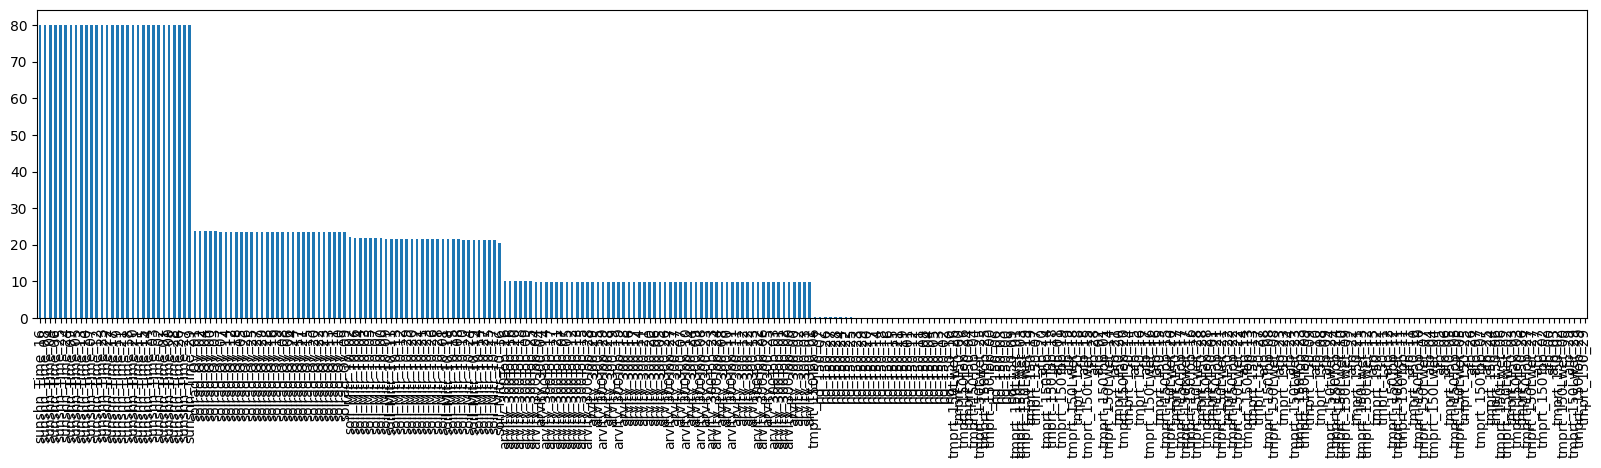

In [ ]:
summarize(X_weather)['Missing Values (%)'].sort_values(ascending=False).plot(kind='bar', figsize=(20,4))

In [ ]:
# Calculate missing value percentages for X_weather
missing_percentage_weather = X_weather.isnull().sum() / len(X_weather) * 100

# Identify columns with missing percentage >= 30% in X_weather
high_missing_cols = missing_percentage_weather[missing_percentage_weather >= 30]

print("Columns in X_weather with >= 30% missing values:")
display(high_missing_cols)

Columns in X_weather with >= 30% missing values:


sunshn_Time_29    80.023937
sunshn_Time_28    80.023937
sunshn_Time_27    80.023937
sunshn_Time_26    80.023937
sunshn_Time_25    80.141322
sunshn_Time_24    80.141322
sunshn_Time_23    80.141322
sunshn_Time_22    80.141322
sunshn_Time_21    80.141322
sunshn_Time_20    80.141322
sunshn_Time_19    80.141322
sunshn_Time_18    80.141322
sunshn_Time_17    80.141322
sunshn_Time_16    80.152830
sunshn_Time_15    80.141322
sunshn_Time_14    80.141322
sunshn_Time_13    80.141322
sunshn_Time_12    80.141322
sunshn_Time_11    80.141322
sunshn_Time_10    80.141322
sunshn_Time_09    80.141322
sunshn_Time_08    80.144390
sunshn_Time_07    80.141322
sunshn_Time_06    80.141322
sunshn_Time_05    80.141322
sunshn_Time_04    80.141322
sunshn_Time_03    80.118305
sunshn_Time_02    80.115236
sunshn_Time_01    80.115236
sunshn_Time_00    80.115236
dtype: float64

In [ ]:
# Identify columns containing 'sunshn_Time'
sunshn_cols_to_drop = [col for col in X_weather.columns if 'sunshn_Time' in col]

# Drop these columns from X_weather
X_weather = X_weather.drop(columns=sunshn_cols_to_drop)

print(f"Dropped {len(sunshn_cols_to_drop)} columns containing 'sunshn_Time'.")
print("New X_weather shape:", X_weather.shape)

Dropped 30 columns containing 'sunshn_Time'.
New X_weather shape: (130341, 270)


In [ ]:
summarize(X_weather)

Data Type  Unique Values  Missing Values (%)  \
tmprt_150_29       float64            245            0.029922   
tmprt_150Top_29    float64            271            0.029922   
tmprt_150Lwet_29   float64            252            0.029922   
hd_150_29          float64            449            0.108945   
arvlty_300_29      float64             47            9.935477   
...                    ...            ...                 ...   
arvlty_300_00      float64             56            9.914762   
arvlty_300Top_00   float64            165            9.915529   
afp_00             float64             34            0.032990   
solrad_Qy_00       float64            791           23.676357   
soil_Mitr_10_00    float64            376           21.706140   

                                                      Sample Values  
tmprt_150_29      [-5.4, -2.6, -1.8, -5.5, 0.2, -5.2, -3.3, -4.9...  
tmprt_150Top_29   [1.3, 3.0, 2.7, 1.8, 7.6, 1.2, 2.0, 2.8, 7.7, ...  
tmprt_150Lwet_29  [-10.6, -7.6, -7.4, -11.6, -5.7, -10.3, -8.8, ...  
hd_150_29         [59.3, 55.9, 46.9, 62.1, 66.8, 65.9, 56.5, 67....  
arvlty_300_29     [0.3, 0.7, 0.5, 0.2, 0.0, 0.4, 0.6, 0.9, 1.0, ...  
...                                                             ...  
arvlty_300_00     [0.2, 0.6, 0.4, 0.0, 0.3, 0.7, 1.5, 1.1, 0.8, ...  
arvlty_300Top_00  [2.8, 6.0, 4.2, 0.0, 7.9, 3.6, 5.1, 7.1, 10.6,...  
afp_00            [1.0, 0.5, 0.0, 2.0, 7.0, 2.5, 10.5, 16.5, 8.5...  
solrad_Qy_00      [3.99, 6.11, 4.73, 9.52, 4.25, 4.23, 7.0, 13.5...  
soil_Mitr_10_00   [16.1, 0.0, 1.3, 23.8, 30.4, 37.5, 12.8, 42.4,...  

[270 rows x 4 columns]

In [ ]:
# Get the summary of X_weather
summary_weather = summarize(X_weather)

# Sort the summary DataFrame by index (column names)
summary_weather_sorted = summary_weather.sort_index()

# Display the sorted summary
display(summary_weather_sorted)

Data Type  Unique Values  Missing Values (%)  \
afp_00         float64             34            0.032990   
afp_01         float64             20            0.032990   
afp_02         float64             35            0.032990   
afp_03         float64             55            0.032990   
afp_04         float64             26            0.032990   
...                ...            ...                 ...   
tmprt_150_25   float64            238            0.032990   
tmprt_150_26   float64            233            0.032990   
tmprt_150_27   float64            238            0.032990   
tmprt_150_28   float64            240            0.032990   
tmprt_150_29   float64            245            0.029922   

                                                  Sample Values  
afp_00        [1.0, 0.5, 0.0, 2.0, 7.0, 2.5, 10.5, 16.5, 8.5...  
afp_01        [1.0, 0.0, 0.5, 1.5, 5.0, 4.5, 4.0, 10.5, 9.5,...  
afp_02        [0.0, 0.5, 1.0, 6.5, 3.5, 1.5, 2.0, 3.0, 2.5, ...  
afp_03        [0.5, 0.0, 1.0, 1.5, 6.0, 2.5, 2.0, 5.0, 3.5, ...  
afp_04        [0.5, 0.0, 1.5, 4.0, 2.5, 1.0, 2.0, 3.5, 3.0, ...  
...                                                         ...  
tmprt_150_25  [-2.8, 0.1, 0.0, -2.3, 0.4, -4.0, -0.3, -2.4, ...  
tmprt_150_26  [-4.6, -2.9, -2.4, -4.8, -1.2, -4.4, -3.4, 3.3...  
tmprt_150_27  [-3.4, -2.0, -1.8, -4.0, 1.8, -2.4, -2.3, -1.5...  
tmprt_150_28  [0.2, 3.1, 3.3, 1.0, 3.2, -1.4, 0.0, 5.8, 4.8,...  
tmprt_150_29  [-5.4, -2.6, -1.8, -5.5, 0.2, -5.2, -3.3, -4.9...  

[270 rows x 4 columns]

### ÏãúÍ≥ÑÏó¥ÏûêÎ£å Ï±ÑÏö∞Í∏∞ ÏãúÍ∞ÑÏàúÏúºÎ°ú

In [ ]:
# ÏÜåÌåÖÏùÑ Ìï¥ÏÑú Ïª¨ÎüºÎ™ÖÏù¥ ÌÖçÏä§Ìä∏Í∞Ä Í∞ôÏùÄ Í∑∏Î£πÎÇ¥ÏóêÏÑú ÎÇ†ÏßúÏàúÏúºÎ°ú ÏïûÎí§Î°ú Ï±ÑÏö∞Î†§Í≥†
X_weather = X_weather.sort_index(axis=1)
X_weather.head()

afp_00  afp_01  afp_02  afp_03  afp_04  afp_05  afp_06  afp_07  afp_08  \
0     1.0     1.0     0.0     0.5     0.5     0.0     0.5     0.0     0.0   
1     1.0     1.0     0.0     0.5     0.5     0.0     0.5     0.0     0.0   
2     0.5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.5     0.0     0.5     0.0     0.0     0.5     0.0     0.0   

   afp_09  ...  tmprt_150_20  tmprt_150_21  tmprt_150_22  tmprt_150_23  \
0     0.0  ...          -1.5          -1.1           0.8           0.2   
1     0.0  ...          -1.5          -1.1           0.8           0.2   
2     0.0  ...           1.0           0.8           3.0           1.7   
3     0.0  ...           1.0           0.8           3.0           1.7   
4     0.0  ...           1.6           1.4           3.4           2.1   

   tmprt_150_24  tmprt_150_25  tmprt_150_26  tmprt_150_27  tmprt_150_28  \
0           2.0          -2.8          -4.6          -3.4           0.2   
1           2.0          -2.8          -4.6          -3.4           0.2   
2           6.0           0.1          -2.9          -2.0           3.1   
3           6.0           0.1          -2.9          -2.0           3.1   
4           4.1           0.0          -2.4          -1.8           3.3   

   tmprt_150_29  
0          -5.4  
1          -5.4  
2          -2.6  
3          -2.6  
4          -1.8  

[5 rows x 270 columns]

In [ ]:
import re

def fix_nan_auto_group(df):

    '''
    ÏãúÍ≥ÑÏó¥ÏûêÎ£å Ï±ÑÏö∞Í∏∞ Î°úÏßÅ
    '''
    result = df.copy()

    # Ïª¨Îüº Ïù¥Î¶ÑÏóêÏÑú Í∑∏Î£π Ï†ëÎëêÏÇ¨(e.g., 'wtf', 'vsf')Î•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ∂ú
    # '_01' Í≥º Í∞ôÏùÄ Î∂ÄÎ∂ÑÏùÑ Ï†úÏô∏ÌïòÍ≥† Í≥†Ïú†Ìïú Í∑∏Î£π Ïù¥Î¶ÑÏùÑ Ï∞æÏùå
    groups = {re.findall(r'(\w+)_', col)[0] for col in df.columns if '_' in col}

    # Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú NaN Í∞í Ï±ÑÏö∞Í∏∞
    for group_name in groups:
        group_cols = [col for col in df.columns if col.startswith(group_name)]
        # Í∑∏Î£π ÎÇ¥ÏóêÏÑú Îí§Ï™Ω Í∞íÏúºÎ°ú Î®ºÏ†Ä Ï±ÑÏö¥ ÌõÑ ÏïûÏ™Ω Í∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
        result[group_cols] = result[group_cols].bfill(axis=1).ffill(axis=1)

    # Í∑∏Î£π ÎÇ¥ÏóêÏÑú Ï±ÑÏõåÏßÄÏßÄ ÏïäÏùÄ NaN(ÌñâÏùò ÏñëÎÅù)ÏùÑ 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
    result = result.fillna(0)

    return result

In [ ]:
X_weather = fix_nan_auto_group(X_weather)

In [ ]:
X_weather.isnull().sum().sum() # Í≤∞Ï∏°Ïπò ÏóÜÏùå

np.int64(0)

In [ ]:
summarize(X_weather)

Data Type  Unique Values  Missing Values (%)  \
afp_00         float64             34                 0.0   
afp_01         float64             20                 0.0   
afp_02         float64             35                 0.0   
afp_03         float64             55                 0.0   
afp_04         float64             26                 0.0   
...                ...            ...                 ...   
tmprt_150_25   float64            239                 0.0   
tmprt_150_26   float64            233                 0.0   
tmprt_150_27   float64            238                 0.0   
tmprt_150_28   float64            241                 0.0   
tmprt_150_29   float64            245                 0.0   

                                                  Sample Values  
afp_00        [1.0, 0.5, 0.0, 2.0, 7.0, 2.5, 10.5, 16.5, 8.5...  
afp_01        [1.0, 0.0, 0.5, 1.5, 5.0, 4.5, 4.0, 10.5, 9.5,...  
afp_02        [0.0, 0.5, 1.0, 6.5, 3.5, 1.5, 2.0, 3.0, 2.5, ...  
afp_03        [0.5, 0.0, 1.0, 1.5, 6.0, 2.5, 2.0, 5.0, 3.5, ...  
afp_04        [0.5, 0.0, 1.5, 4.0, 2.5, 1.0, 2.0, 3.5, 3.0, ...  
...                                                         ...  
tmprt_150_25  [-2.8, 0.1, 0.0, -2.3, 0.4, -4.0, -0.3, -2.4, ...  
tmprt_150_26  [-4.6, -2.9, -2.4, -4.8, -1.2, -4.4, -3.4, 3.3...  
tmprt_150_27  [-3.4, -2.0, -1.8, -4.0, 1.8, -2.4, -2.3, -1.5...  
tmprt_150_28  [0.2, 3.1, 3.3, 1.0, 3.2, -1.4, 0.0, 5.8, 4.8,...  
tmprt_150_29  [-5.4, -2.6, -1.8, -5.5, 0.2, -5.2, -3.3, -4.9...  

[270 rows x 4 columns]

### ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨

In [ ]:
# Merge X_weather and X_lims based on their index
X = pd.concat([X_weather, X_lims], axis=1)
print("Shape of the combined DataFrame (X_combined):", X.shape)

Shape of the combined DataFrame (X_combined): (130341, 272)


In [ ]:
y = y_df_filtered.copy()
print("Shape of target:", y.shape)

Shape of target: (130341,)


In [ ]:
summarize(X)

Data Type  Unique Values  Missing Values (%)  \
afp_00              float64             34                 0.0   
afp_01              float64             20                 0.0   
afp_02              float64             35                 0.0   
afp_03              float64             55                 0.0   
afp_04              float64             26                 0.0   
...                     ...            ...                 ...   
tmprt_150_27        float64            238                 0.0   
tmprt_150_28        float64            241                 0.0   
tmprt_150_29        float64            245                 0.0   
INSPCT_PURPS_NAME    object              5                 0.0   
PRDLST_NM            object             90                 0.0   

                                                       Sample Values  
afp_00             [1.0, 0.5, 0.0, 2.0, 7.0, 2.5, 10.5, 16.5, 8.5...  
afp_01             [1.0, 0.0, 0.5, 1.5, 5.0, 4.5, 4.0, 10.5, 9.5,...  
afp_02             [0.0, 0.5, 1.0, 6.5, 3.5, 1.5, 2.0, 3.0, 2.5, ...  
afp_03             [0.5, 0.0, 1.0, 1.5, 6.0, 2.5, 2.0, 5.0, 3.5, ...  
afp_04             [0.5, 0.0, 1.5, 4.0, 2.5, 1.0, 2.0, 3.5, 3.0, ...  
...                                                              ...  
tmprt_150_27       [-3.4, -2.0, -1.8, -4.0, 1.8, -2.4, -2.3, -1.5...  
tmprt_150_28       [0.2, 3.1, 3.3, 1.0, 3.2, -1.4, 0.0, 5.8, 4.8,...  
tmprt_150_29       [-5.4, -2.6, -1.8, -5.5, 0.2, -5.2, -3.3, -4.9...  
INSPCT_PURPS_NAME                 [ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨, ÏàòÍ±∞Í≤ÄÏÇ¨, ÌíàÏßàÍ≤ÄÏÇ¨, Í∏∞ÌÉÄ, Î™®ÎãàÌÑ∞ÎßÅÍ≤ÄÏÇ¨]  
PRDLST_NM          [Í≥ºÏûê, Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏), ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥º...  

[272 rows x 4 columns]

In [ ]:
# Create a DataFrame for the target variable y
y = pd.read_pickle('/content/drive/MyDrive/·ÑÉ·Ö°·Ñã·ÖÆ·Ü´·Ñâ·Ö°·Ñã·Öµ·Ñå·Öµ·Üº.pkl')

# Display the head of the y DataFrame
display(y.head())

JDGMNT_WORD_NAME_encoded  INSPCT_Í∏∞ÌÉÄ  INSPCT_ÏàòÍ±∞Í≤ÄÏÇ¨  INSPCT_ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨  \
0                         0      False        False             True   
1                         0      False        False             True   
2                         0      False        False             True   
3                         0      False        False             True   
4                         0      False        False             True   

   PRDLST_Í∞ïÌô©Ï∂îÏ∂úÎ¨º(Ï†ú2023-5Ìò∏)  PRDLST_Í≥†Ï∂ßÍ∞ÄÎ£®  PRDLST_Í≥°Î•òÍ∞ÄÍ≥µÌíà  PRDLST_Í≥º.Ï±ÑÍ∞ÄÍ≥µÌíà  \
0                   False        False         False          False   
1                   False        False         False          False   
2                   False        False         False          False   
3                   False        False         False          False   
4                   False        False         False          False   

   PRDLST_Í≥ºÏûê  PRDLST_Í∏∞ÌÉÄ_999  ...  PRDLST_Ïö∞Ïú†  PRDLST_Ï≤úÏó∞Ìñ•Ïã†Î£å  PRDLST_Ï¥àÏΩúÎ¶øÍ∞ÄÍ≥µÌíà  \
0       True          False  ...      False         False          False   
1       True          False  ...      False         False          False   
2      False          False  ...      False         False          False   
3      False          False  ...      False         False          False   
4       True          False  ...      False         False          False   

   PRDLST_Ïπ®Ï∂úÏ∞®  PRDLST_Ï∫îÎîîÎ•ò  PRDLST_ÌïúÏãùÍ∞ÑÏû•  PRDLST_ÌïúÏãùÎêúÏû•  PRDLST_ÌïúÏãùÎ©îÏ£º  PRDLST_ÌòºÌï©Í∞ÑÏû•  \
0       False       False        False        False        False        False   
1       False       False        False        False        False        False   
2       False       False        False        False        False        False   
3       False       False        False        False        False        False   
4       False       False        False        False        False        False   

   PRDLST_Ìö®ÏÜåÏãùÌíà  
0        False  
1        False  
2        False  
3        False  
4        False  

[5 rows x 34 columns]

In [ ]:
# Merge X and y based on their index
# Using pd.concat with axis=1 assumes both dataframes have the same index
merged_df = pd.concat([X,y], axis=1, join='inner', ignore_index=False, keys=None)
merged_df.columns

Index(['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06',
       'afp_07', 'afp_08', 'afp_09',
       ...
       'PRDLST_Ïö∞Ïú†', 'PRDLST_Ï≤úÏó∞Ìñ•Ïã†Î£å', 'PRDLST_Ï¥àÏΩúÎ¶øÍ∞ÄÍ≥µÌíà', 'PRDLST_Ïπ®Ï∂úÏ∞®',
       'PRDLST_Ï∫îÎîîÎ•ò', 'PRDLST_ÌïúÏãùÍ∞ÑÏû•', 'PRDLST_ÌïúÏãùÎêúÏû•', 'PRDLST_ÌïúÏãùÎ©îÏ£º',
       'PRDLST_ÌòºÌï©Í∞ÑÏû•', 'PRDLST_Ìö®ÏÜåÏãùÌíà'],
      dtype='object', length=306)

### Î∂ÄÏ†ÅÌï© ÎπÑÏú®Ïù¥ ÏûàÎäî Í≤ÄÏÇ¨Ïùò Ï¢ÖÎ•ò

In [ ]:
# Calculate the mean of JDGMNT_WORD_NAME_encoded, grouped by INSPCT_PURPS_NAME
grouped_mean_by_purpose = merged_df.groupby('INSPCT_PURPS_NAME')['JDGMNT_WORD_NAME_encoded'].mean()

print("Mean of encoded 'JDGMNT_WORD_NAME' by 'INSPCT_PURPS_NAME' (proportion of 'Î∂ÄÏ†ÅÌï©'):")
display(grouped_mean_by_purpose)

Mean of encoded 'JDGMNT_WORD_NAME' by 'INSPCT_PURPS_NAME' (proportion of 'Î∂ÄÏ†ÅÌï©'):


INSPCT_PURPS_NAME
Í∏∞ÌÉÄ          0.105691
ÏàòÍ±∞Í≤ÄÏÇ¨        0.009476
ÏûêÍ∞ÄÌíàÏßàÏúÑÌÉÅÍ≤ÄÏÇ¨    0.004240
Name: JDGMNT_WORD_NAME_encoded, dtype: float64

### Î∂ÄÏ†ÅÌï© ÎπÑÏú®Ïù¥ ÏûàÎäî Í∞ÄÍ≥µÏãùÌíàÏùò Ï¢ÖÎ•ò (ÏÉÅÏúÑÎ∂ÑÎ•òÎ©¥Ïù¥ ÌïÑÏöî)

In [ ]:
# Calculate the mean of the encoded JDGMNT_WORD_NAME, grouped by PRDLST_NM
grouped_mean_by_prdlst = merged_df.groupby('PRDLST_NM')['JDGMNT_WORD_NAME_encoded'].mean()
# Filter the series to show only the rows where the mean is greater than 0
prdlst_with_failures = grouped_mean_by_prdlst[grouped_mean_by_prdlst > 0]
print("Product Names (PRDLST_NM) with at least one 'Î∂ÄÏ†ÅÌï©' case:")
display(prdlst_with_failures)

Product Names (PRDLST_NM) with at least one 'Î∂ÄÏ†ÅÌï©' case:


PRDLST_NM
Í∞ïÌô©Ï∂îÏ∂úÎ¨º(Ï†ú2023-5Ìò∏)                    0.022222
Í≥†Ï∂ßÍ∞ÄÎ£®                               0.014652
Í≥°Î•òÍ∞ÄÍ≥µÌíà                              0.007460
Í≥º.Ï±ÑÍ∞ÄÍ≥µÌíà                             0.002522
Í≥ºÏûê                                 0.007485
Í∏∞ÌÉÄ_999                             0.004814
Í∏∞ÌÉÄÍ∞ÄÍ≥µÌíà                              0.031250
ÎëêÎ•òÍ∞ÄÍ≥µÌíà                              0.003509
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•ò Í∞ÄÍ≥µÌíà                      0.001823
ÎïÖÏΩ© ÎòêÎäî Í≤¨Í≥ºÎ•òÍ∞ÄÍ≥µÌíà                       0.001599
ÎïÖÏΩ©Î≤ÑÌÑ∞                               0.003207
Îñ°Î•ò                                 0.008368
ÎØ∏Í∞ïÏ£ºÏ†ïÏ∂îÏ∂úÎ¨º(Ï†ú2018-3Ìò∏)                  0.028846
Î≥¥Ïä§Ïõ∞Î¶¨ÏïÑÏ∂îÏ∂úÎ¨ºÎì± Î≥µÌï©Î¨º(Flexir)(Ï†ú2021-9Ìò∏)    0.033333
Î≥µÌï©Ï°∞ÎØ∏ÏãùÌíà                             0.153846
ÎπµÎ•ò                                 0.003215
ÏÜåÏä§                                 0.002888
ÏàòÏàò                                 0.135593
ÏòÅ.Ïú†ÏïÑÏö© Ïù¥Ïú†Ïãù                          0.007576
Ïò•ÏàòÏàòÍ±¥Ï°∞                              0.206897
Ïö∞Ïú†                                 0.007229
Ï≤úÏó∞Ìñ•Ïã†Î£å                              0.060000
Ï¥àÏΩúÎ¶øÍ∞ÄÍ≥µÌíà                             0.009756
Ïπ®Ï∂úÏ∞®                                0.018919
Ï∫îÎîîÎ•ò                                0.002342
ÌïúÏãùÍ∞ÑÏû•                               0.061728
ÌïúÏãùÎêúÏû•                               0.051724
ÌïúÏãùÎ©îÏ£º                               0.012586
ÌòºÌï©Í∞ÑÏû•                               0.015094
Ìö®ÏÜåÏãùÌíà                               0.021277
Name: JDGMNT_WORD_NAME_encoded, dtype: float64

# **2. ÏòàÏ∏°Î™®Ìòï Í∞úÎ∞ú**
### Ï†ÑÏ≤òÎ¶¨Ìïú(ÌäπÏÑ±Î≥ÄÏàò Ï∂îÏ∂úÏùÄ ÏóÜÏùå) Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°Î™®ÌòïÏóê Ìà¨ÏûÖ
### 2.1. Features and Target

In [ ]:
merged_df.columns

Index(['afp_00', 'afp_01', 'afp_02', 'afp_03', 'afp_04', 'afp_05', 'afp_06',
       'afp_07', 'afp_08', 'afp_09',
       ...
       'PRDLST_Ïö∞Ïú†', 'PRDLST_Ï≤úÏó∞Ìñ•Ïã†Î£å', 'PRDLST_Ï¥àÏΩúÎ¶øÍ∞ÄÍ≥µÌíà', 'PRDLST_Ïπ®Ï∂úÏ∞®',
       'PRDLST_Ï∫îÎîîÎ•ò', 'PRDLST_ÌïúÏãùÍ∞ÑÏû•', 'PRDLST_ÌïúÏãùÎêúÏû•', 'PRDLST_ÌïúÏãùÎ©îÏ£º',
       'PRDLST_ÌòºÌï©Í∞ÑÏû•', 'PRDLST_Ìö®ÏÜåÏãùÌíà'],
      dtype='object', length=306)

In [ ]:
# Create the feature matrix X by dropping the specified columns
X = merged_df.drop(columns=['JDGMNT_WORD_NAME_encoded'])

# Create the target variable y using the encoded column
y = merged_df['JDGMNT_WORD_NAME_encoded']

print("Shape of feature matrix (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of feature matrix (X): (113491, 305)
Shape of target variable (y): (113491,)


In [ ]:
X

afp_00  afp_01  afp_02  afp_03  afp_04  afp_05  afp_06  afp_07  \
0          1.0     1.0     0.0     0.5     0.5     0.0     0.5     0.0   
1          1.0     1.0     0.0     0.5     0.5     0.0     0.5     0.0   
2          0.5     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3          0.5     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4          0.0     0.5     0.0     0.5     0.0     0.0     0.5     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
169086     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
169235     0.0     0.0     0.5     1.0     0.0     0.0     0.0     0.0   
169237     0.0     0.0     0.0     0.5     0.0     0.0     0.0     0.0   
170023     0.0     0.0     0.5     1.0     0.0     0.0     0.0     0.0   
170024     0.0     0.0     0.0     0.5     0.0     0.0     0.0     0.0   

        afp_08  afp_09  ...  PRDLST_Ïö∞Ïú†  PRDLST_Ï≤úÏó∞Ìñ•Ïã†Î£å  PRDLST_Ï¥àÏΩúÎ¶øÍ∞ÄÍ≥µÌíà  \
0          0.0     0.0  ...      False         False          False   
1          0.0     0.0  ...      False         False          False   
2          0.0     0.0  ...      False         False          False   
3          0.0     0.0  ...      False         False          False   
4          0.0     0.0  ...      False         False          False   
...        ...     ...  ...        ...           ...            ...   
169086     0.0     0.0  ...      False         False          False   
169235     0.0     0.0  ...      False         False          False   
169237     0.0     0.0  ...      False         False          False   
170023     0.0     0.0  ...      False         False          False   
170024     0.0     0.0  ...      False         False          False   

        PRDLST_Ïπ®Ï∂úÏ∞®  PRDLST_Ï∫îÎîîÎ•ò  PRDLST_ÌïúÏãùÍ∞ÑÏû•  PRDLST_ÌïúÏãùÎêúÏû•  PRDLST_ÌïúÏãùÎ©îÏ£º  \
0            False       False        False        False        False   
1            False       False        False        False        False   
2            False       False        False        False        False   
3            False       False        False        False        False   
4            False       False        False        False        False   
...            ...         ...          ...          ...          ...   
169086        True       False        False        False        False   
169235       False       False        False        False        False   
169237       False       False        False        False        False   
170023       False       False        False        False        False   
170024       False       False        False        False        False   

        PRDLST_ÌòºÌï©Í∞ÑÏû•  PRDLST_Ìö®ÏÜåÏãùÌíà  
0             False        False  
1             False        False  
2             False        False  
3             False        False  
4             False        False  
...             ...          ...  
169086        False        False  
169235        False        False  
169237        False        False  
170023        False        False  
170024        False        False  

[113491 rows x 305 columns]

1.  **Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (`train_test_split`)**
    * Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏö©(80%)Í≥º ÌÖåÏä§Ìä∏Ïö©(20%)ÏúºÎ°ú ÎÇòÎàïÎãàÎã§.
    * `stratify=y` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ ÎπÑÏú®(ÏñëÏÑ±/ÏùåÏÑ± ÎπÑÏú®)Ïù¥ ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÎêòÎèÑÎ°ù Ìï©ÎãàÎã§. Ïù¥Îäî Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞ÄÏùò Ïã†Î¢∞ÏÑ±ÏùÑ ÎÜíÏù¥Îäî Ï§ëÏöîÌïú Îã®Í≥ÑÏûÖÎãàÎã§.

2.  **Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï (`ColumnTransformer`)**
    * Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÏàò Ïú†ÌòïÏóê Îî∞Îùº ÎßûÏ∂§Ìòï Ï†ÑÏ≤òÎ¶¨Î•º Ï†ïÏùòÌï©ÎãàÎã§.
    * **Ïà´ÏûêÌòï Î≥ÄÏàò (`StandardScaler`)**: Î™®Îì† Ïà´Ïûê Îç∞Ïù¥ÌÑ∞Ïùò Îã®ÏúÑÎ•º ÌÜµÏùºÌïòÏó¨ ÌäπÏ†ï Î≥ÄÏàòÍ∞Ä Î™®Îç∏Ïóê Í≥ºÎèÑÌïú ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï©ÎãàÎã§.
    * **Î¨∏ÏûêÌòï Î≥ÄÏàò (`OneHotEncoder`)**: Î¨∏Ïûê Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎäî 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Ïà´Ïûê Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# 1. Train/Test Î∂ÑÎ¶¨ (Î®ºÏ†Ä Ìï¥Ïïº Ìï®!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Î≥ÄÏàò Ïú†Ìòï Î∂ÑÎ¶¨
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')


3.  **SMOTE Í∏∞Î≤ï ÎπÑÍµêÎ•º ÏúÑÌïú ÏûêÎèôÌôî (`for` Î£®ÌîÑ & `ImbPipeline`)**
    * ÎπÑÍµêÌïòÎ†§Îäî 4Í∞ÄÏßÄ SMOTE Í∏∞Î≤ï(SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN)ÏùÑ ÏàúÌöåÌïòÎäî Î∞òÎ≥µÎ¨∏ÏùÑ ÎßåÎì≠ÎãàÎã§.
    * `ImbPipeline`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ **[Ï†ÑÏ≤òÎ¶¨ ‚Üí Ïò§Î≤ÑÏÉòÌîåÎßÅ ‚Üí Î™®Îç∏ ÌïôÏäµ]** Í≥ºÏ†ïÏùÑ ÌïòÎÇòÎ°ú Î¨∂ÏäµÎãàÎã§. Ïù¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ ÍµêÏ∞® Í≤ÄÏ¶ù Ïãú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò§ÏóºÎêòÎäî Í≤É(Data Leakage)ÏùÑ Î∞©ÏßÄÌïòÍ≥† Ï†ïÌôïÌïú ÏÑ±Îä• Ï∏°Ï†ïÏùÑ Î≥¥Ïû•Ìï©ÎãàÎã§.

4.  **Î™®Îç∏ ÌïôÏäµ Î∞è ÍµêÏ∞® Í≤ÄÏ¶ù (`RandomizedSearchCV`)**
    * Í∞Å SMOTE Í∏∞Î≤ïÏóê ÎåÄÌï¥ 5-Í≤π ÍµêÏ∞® Í≤ÄÏ¶ù(`StratifiedKFold`)ÏùÑ ÏàòÌñâÌïòÏó¨ Î™®Îç∏Ïùò ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
    * `scoring='recall'`Î°ú ÏÑ§Ï†ïÌïòÏó¨, Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌäπÌûà Ï§ëÏöîÌïú ÏÜåÏàò ÌÅ¥ÎûòÏä§(ÏñëÏÑ±)Î•º ÏñºÎßàÎÇò Ïûò Ï∞æÏïÑÎÇ¥ÎäîÏßÄÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
    * `RandomizedSearchCV`Î•º ÏÇ¨Ïö©ÌñàÏßÄÎßå, ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(`param_distributions`)Î•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ ÏΩîÎìúÏóêÏÑúÎäî ÏÇ¨Ïã§ÏÉÅ ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌïú Í∏∞Î≥∏ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Ïó≠Ìï†Îßå ÏàòÌñâÌï©ÎãàÎã§.

5.  **Í≤∞Í≥º Ï∑®Ìï© Î∞è ÎπÑÍµê**
    * Í∞Å SMOTE Í∏∞Î≤ïÏúºÎ°ú ÌïôÏäµÎêú ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÎ¶¨Ìï¥ ÎëêÏóàÎçò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÏµúÏ¢Ö ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.
    * ÌèâÍ∞Ä Ï†êÏàòÎ•º `results` ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•ÌïòÍ≥†, ÎßàÏßÄÎßâÏóê Î™®Îì† Í∏∞Î≤ïÏùò ÏÑ±Îä•ÏùÑ ÌïúÎààÏóê ÎπÑÍµêÌï† Ïàò ÏûàÎèÑÎ°ù ÏöîÏïΩÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.

In [ ]:
# ÏÇ¨Ïö©Ìï† SMOTE Í∏∞Î≤ïÎì§
smote_methods = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}

# Í≤∞Í≥º Ï†ÄÏû•Ïö©
results = {}

# Î∞òÎ≥µÎ¨∏ÏúºÎ°ú Í∞Å SMOTE Í∏∞Î≤ï Ï†ÅÏö©
for name, smote in smote_methods.items():
    print(f"\n=== Running with {name} ===")

    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('classifier', XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        ))
    ])

    # ÍµêÏ∞® Í≤ÄÏ¶ù ÏÑ§Ï†ï
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù (ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶¨ÏßÄ ÏïäÍ≤å Í∏∞Î≥∏Í∞í)
    param_distributions = {}  # ÏßÄÍ∏àÏùÄ ÎπÑÏõåÎë†

    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions,
        n_iter=10,  # param_distributions ÎπÑÏõåÎëî Í≤ΩÏö∞ ÏùòÎØ∏ ÏóÜÏùå
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    # ÏÑ±Îä• Í∏∞Î°ù
    score = random_search.best_estimator_.score(X_test, y_test)
    results[name] = score
    print(f"{name} Test Score: {score:.4f}")

# ÏµúÏ¢Ö Í≤∞Í≥º ÎπÑÍµê
print("\n=== Summary of SMOTE methods ===")
for method, score in results.items():
    print(f"{method}: {score:.4f}")


=== Running with SMOTE ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
SMOTE Test Score: 0.9277

=== Running with BorderlineSMOTE ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
BorderlineSMOTE Test Score: 0.9732

=== Running with SVMSMOTE ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVMSMOTE Test Score: 0.9743

=== Running with ADASYN ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
ADASYN Test Score: 0.9257

=== Summary of SMOTE methods ===
SMOTE: 0.9277
BorderlineSMOTE: 0.9732
SVMSMOTE: 0.9743
ADASYN: 0.9257


# Í∏∞Ï°¥ ÍµêÏàòÎãòÏΩîÎìúÏóêÏÑú ÏàòÏ†ïÏ†ê
1. train_test_split: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 20%Îäî TestÎ°ú Î∂ÑÎ¶¨ ‚Üí ÏÑ±Îä• ÌèâÍ∞ÄÏö©.

2. Ïó¨Îü¨ SMOTE Í∏∞Î≤ï ÎπÑÍµê: for Î∞òÎ≥µÎ¨∏ÏúºÎ°ú ÎèåÎ©¥ÏÑú Í∞ÅÍ∞Å Recall Ï§ëÏã¨ ÏÑ±Îä• Ï∏°Ï†ï.

3. Í≤∞Í≥º Í∏∞Î°ù: results ÎîïÏÖîÎÑàÎ¶¨Ïóê SMOTE Í∏∞Î≤ïÎ≥Ñ Test ÏÑ±Îä• Ï†ÄÏû• Î∞è Ï∂úÎ†•.

### 2.3. Í≤∞Í≥º ÌôïÏù∏
ÌäúÎãùÏù¥ ÏôÑÎ£åÎêú ÌõÑ, ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏôÄ ÍµêÏ∞® Í≤ÄÏ¶ù Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.


DETAILED EVALUATION FOR EACH SMOTE METHOD

==================== SMOTE DETAILED ANALYSIS ====================

üìä Classification Report for SMOTE:
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     22587
           1       0.03      0.43      0.06       112

    accuracy                           0.93     22699
   macro avg       0.51      0.68      0.51     22699
weighted avg       0.99      0.93      0.96     22699

üéØ ROC AUC Score: 0.8540
üéØ Average Precision Score: 0.0788

==================== BorderlineSMOTE DETAILED ANALYSIS ====================

üìä Classification Report for BorderlineSMOTE:
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22587
           1       0.04      0.18      0.06       112

    accuracy                           0.97     22699
   macro avg  

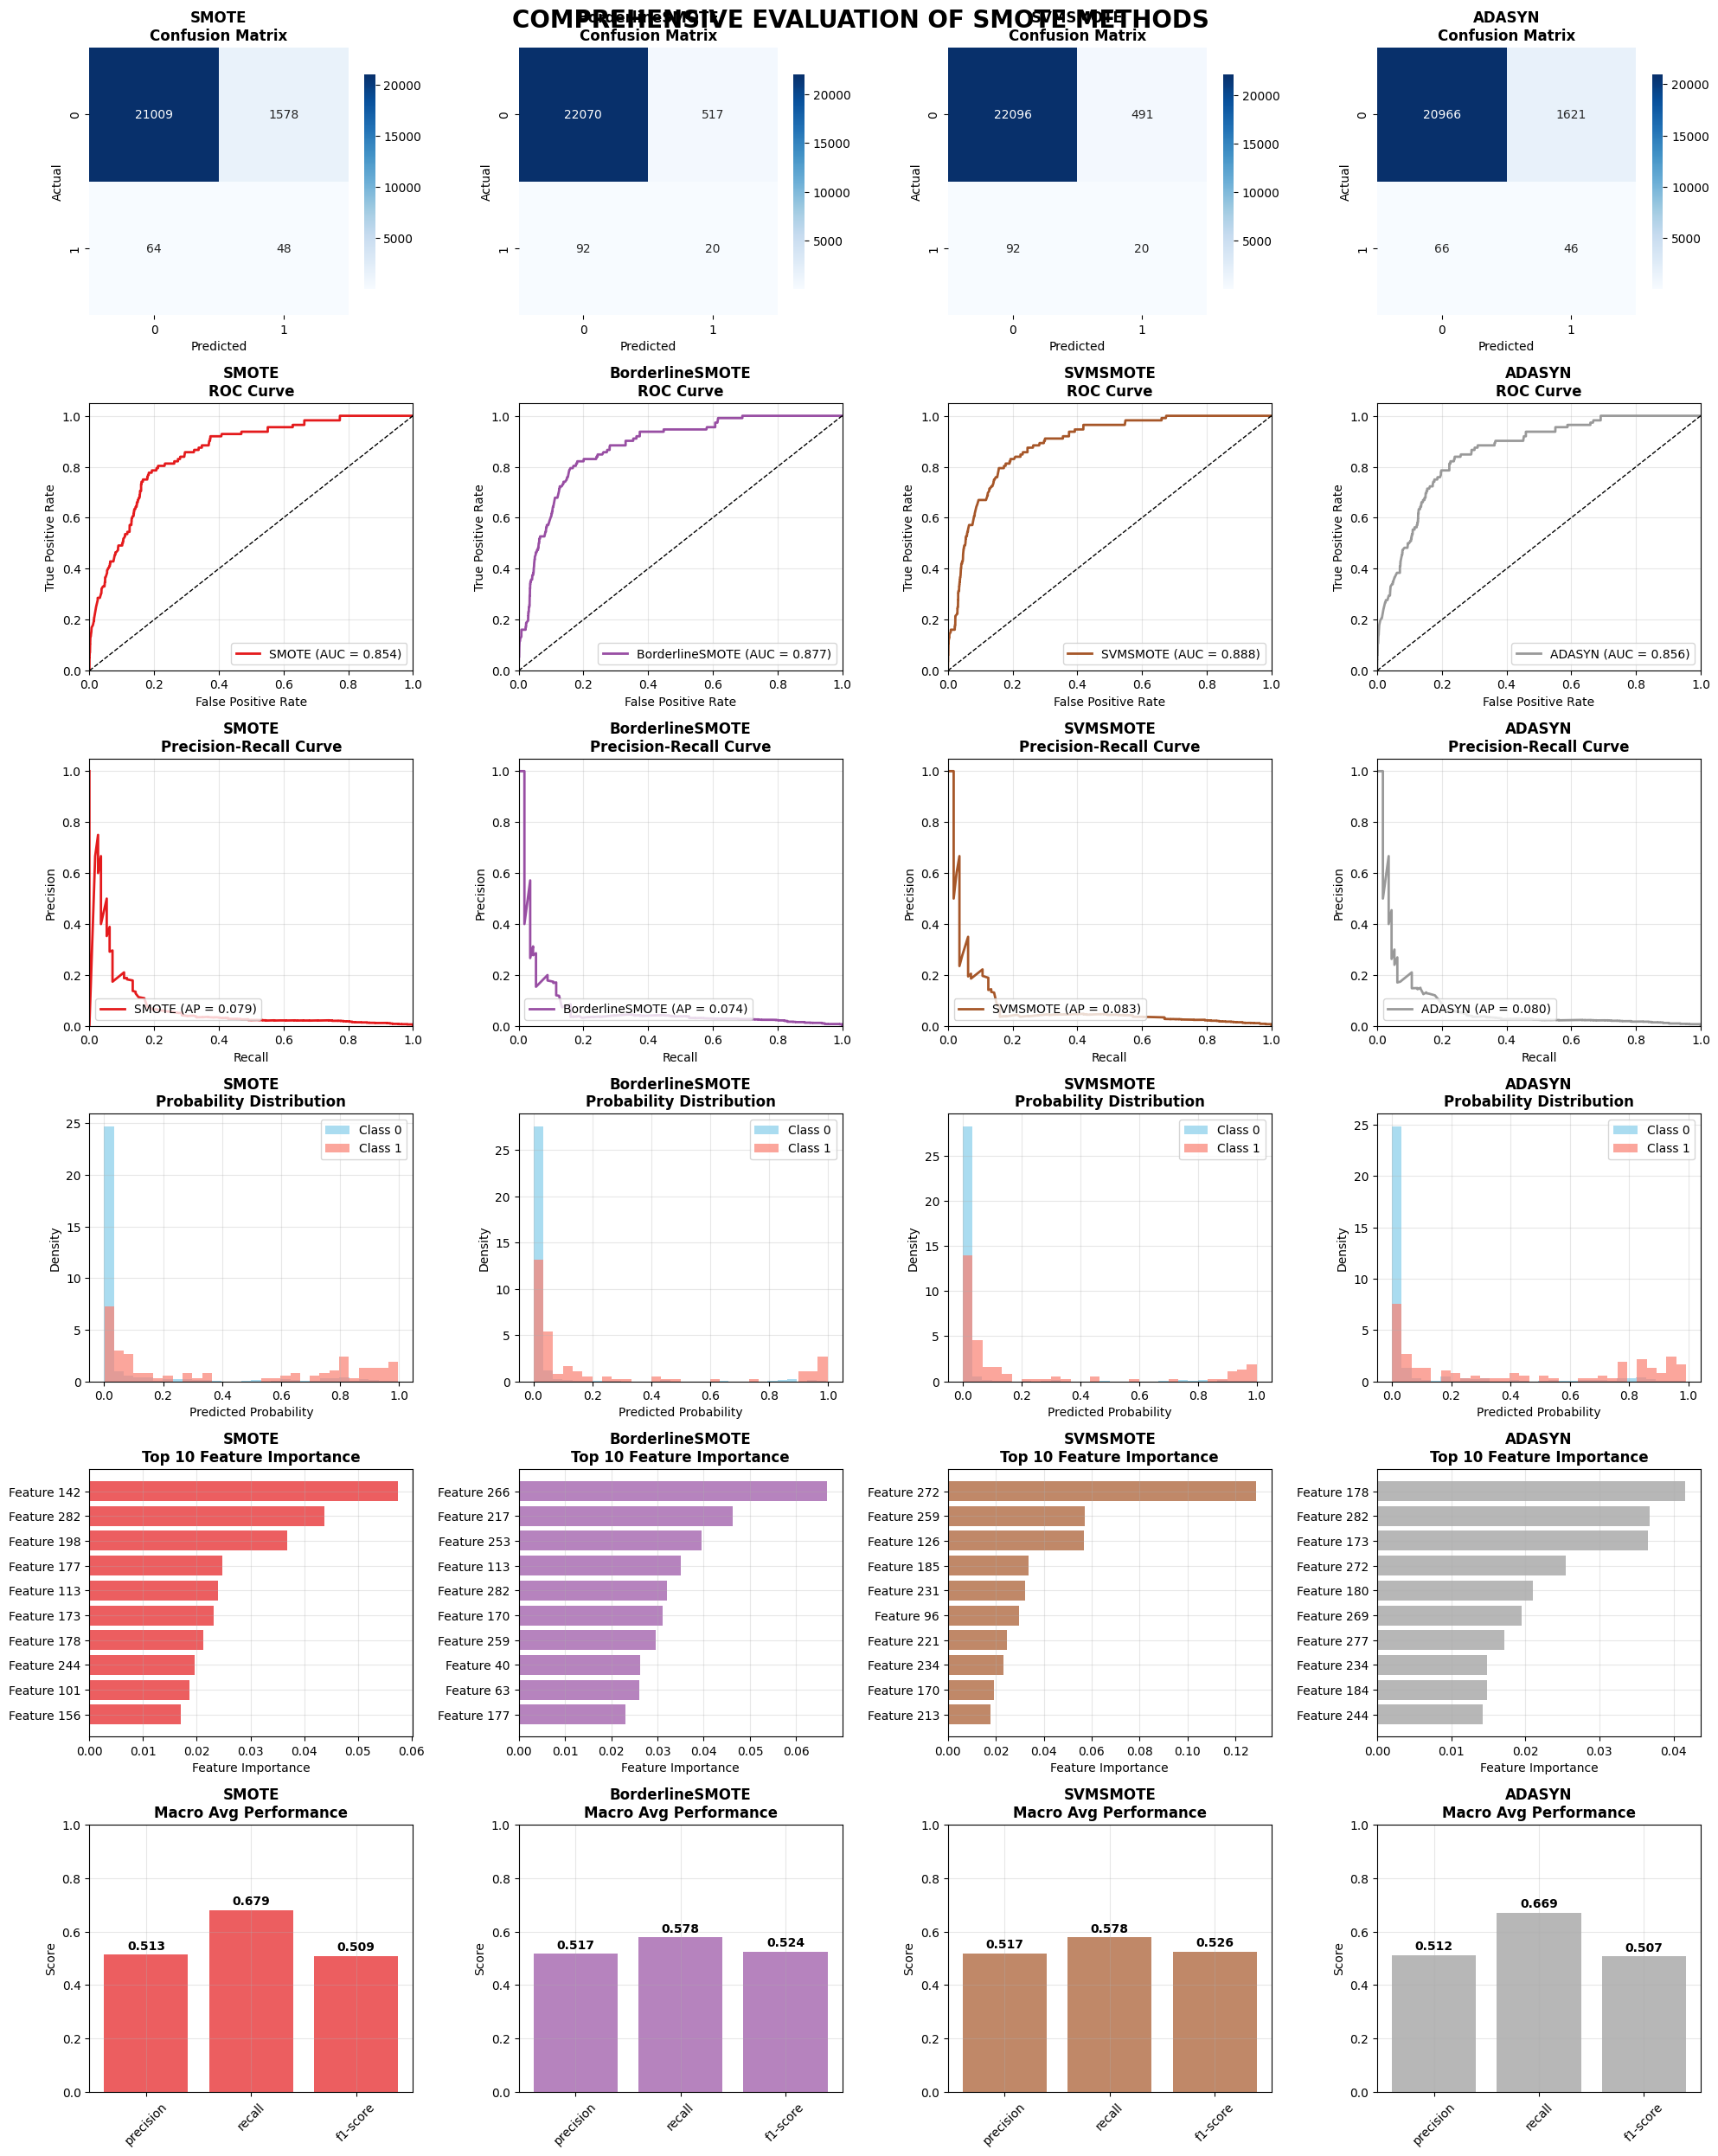


üìà COMPREHENSIVE PERFORMANCE COMPARISON
         Method  ROC AUC  Avg Precision  Macro Precision  Macro Recall  Macro F1
          SMOTE   0.8540         0.0788           0.5132        0.6794    0.5088
BorderlineSMOTE   0.8767         0.0741           0.5165        0.5778    0.5240
       SVMSMOTE   0.8881         0.0827           0.5175        0.5784    0.5256
         ADASYN   0.8564         0.0798           0.5122        0.6695    0.5065

üèÜ BEST PERFORMING METHODS:
   ‚Ä¢ Best ROC AUC: SVMSMOTE (0.8881)
   ‚Ä¢ Best Macro F1: SVMSMOTE (0.5256)
   ‚Ä¢ Best Avg Precision: SVMSMOTE (0.0827)

ANALYSIS COMPLETE! üéâ


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 10)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨ ÌôïÏû•
detailed_results = {}

print("\n" + "="*80)
print("DETAILED EVALUATION FOR EACH SMOTE METHOD")
print("="*80)

# Í∞Å SMOTE Î∞©Î≤ïÎ≥ÑÎ°ú ÏÉÅÏÑ∏ ÌèâÍ∞Ä
for name, smote in smote_methods.items():
    print(f"\n{'='*20} {name} DETAILED ANALYSIS {'='*20}")

    # ÌååÏù¥ÌîÑÎùºÏù∏ Ïû¨Íµ¨ÏÑ±
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smote),
        ('classifier', XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        ))
    ])

    # ÌïôÏäµ Î∞è ÏòàÏ∏°
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # 1. Classification Report
    print(f"\nüìä Classification Report for {name}:")
    print("-" * 50)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # 2. Í∞ÅÏ¢Ö Î©îÌä∏Î¶≠ Í≥ÑÏÇ∞
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    # Í≤∞Í≥º Ï†ÄÏû•
    detailed_results[name] = {
        'pipeline': pipeline,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'classification_report': report,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision
    }

    print(f"üéØ ROC AUC Score: {roc_auc:.4f}")
    print(f"üéØ Average Precision Score: {avg_precision:.4f}")

# ÏãúÍ∞ÅÌôî
n_methods = len(smote_methods)
fig = plt.figure(figsize=(20, 25))

# ÏÉâÏÉÅ ÌåîÎ†àÌä∏ ÏÑ§Ï†ï
colors = plt.cm.Set1(np.linspace(0, 1, n_methods))

for idx, (name, results_data) in enumerate(detailed_results.items()):
    y_pred = results_data['y_pred']
    y_pred_proba = results_data['y_pred_proba']
    color = colors[idx]

    # 1. Confusion Matrix
    plt.subplot(6, n_methods, idx + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'shrink': 0.8})
    plt.title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # 2. ROC Curve
    plt.subplot(6, n_methods, n_methods + idx + 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}\nROC Curve', fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)

    # 3. Precision-Recall Curve
    plt.subplot(6, n_methods, 2*n_methods + idx + 1)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    plt.plot(recall, precision, color=color, lw=2,
             label=f'{name} (AP = {avg_precision:.3f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name}\nPrecision-Recall Curve', fontweight='bold')
    plt.legend(loc="lower left", fontsize=10)
    plt.grid(True, alpha=0.3)

    # 4. Predicted Probability Distribution
    plt.subplot(6, n_methods, 3*n_methods + idx + 1)
    # ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•† Î∂ÑÌè¨
    prob_class_0 = y_pred_proba[y_test == 0]
    prob_class_1 = y_pred_proba[y_test == 1]

    plt.hist(prob_class_0, bins=30, alpha=0.7, label='Class 0',
             color='skyblue', density=True)
    plt.hist(prob_class_1, bins=30, alpha=0.7, label='Class 1',
             color='salmon', density=True)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title(f'{name}\nProbability Distribution', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 5. Feature Importance (XGBoostÏùò Í≤ΩÏö∞)
    plt.subplot(6, n_methods, 4*n_methods + idx + 1)
    try:
        # Ï†ÑÏ≤òÎ¶¨Îêú ÌäπÏÑ± Ïù¥Î¶Ñ ÏÉùÏÑ±
        feature_names = []
        if len(numerical_features) > 0:
            feature_names.extend([f'num_{col}' for col in numerical_features])
        if len(categorical_features) > 0:
            # OneHotEncoderÎ°ú Ïù∏Ìïú ÌôïÏû•Îêú ÌäπÏÑ±Î™ÖÏùÄ Í∞ÑÎã®Ìûà Ï≤òÎ¶¨
            feature_names.extend([f'cat_{i}' for i in range(len(categorical_features)*10)])  # ÎåÄÎûµÏ†Å Ï∂îÏ†ï

        classifier = results_data['pipeline'].named_steps['classifier']
        importances = classifier.feature_importances_

        # ÏÉÅÏúÑ 10Í∞ú ÌäπÏÑ±Îßå ÌëúÏãú
        top_indices = np.argsort(importances)[-10:]
        top_importances = importances[top_indices]

        plt.barh(range(len(top_importances)), top_importances, color=color, alpha=0.7)
        plt.xlabel('Feature Importance')
        plt.title(f'{name}\nTop 10 Feature Importance', fontweight='bold')
        plt.yticks(range(len(top_importances)), [f'Feature {i}' for i in top_indices])
        plt.grid(True, alpha=0.3)
    except Exception as e:
        plt.text(0.5, 0.5, f'Feature importance\nnot available\n({str(e)[:30]}...)',
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'{name}\nFeature Importance', fontweight='bold')

    # 6. ÏÑ±Îä• Î©îÌä∏Î¶≠ Î∞îÏ∞®Ìä∏
    plt.subplot(6, n_methods, 5*n_methods + idx + 1)
    report = results_data['classification_report']
    metrics = ['precision', 'recall', 'f1-score']

    # ÌÅ¥ÎûòÏä§Î≥Ñ ÏÑ±Îä• (Îß§ÌÅ¨Î°ú ÌèâÍ∑† ÏÇ¨Ïö©)
    macro_scores = [report['macro avg'][metric] for metric in metrics]

    bars = plt.bar(metrics, macro_scores, color=[color]*3, alpha=0.7)
    plt.ylim([0, 1])
    plt.ylabel('Score')
    plt.title(f'{name}\nMacro Avg Performance', fontweight='bold')
    plt.xticks(rotation=45)

    # Î∞î ÏúÑÏóê Í∞í ÌëúÏãú
    for bar, score in zip(bars, macro_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('COMPREHENSIVE EVALUATION OF SMOTE METHODS',
             fontsize=20, fontweight='bold', y=0.995)
plt.show()

# Ï¢ÖÌï© ÏÑ±Îä• ÎπÑÍµêÌëú Ï∂úÎ†•
print("\n" + "="*80)
print("üìà COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Method': list(detailed_results.keys()),
    'ROC AUC': [detailed_results[method]['roc_auc'] for method in detailed_results.keys()],
    'Avg Precision': [detailed_results[method]['avg_precision'] for method in detailed_results.keys()],
    'Macro Precision': [detailed_results[method]['classification_report']['macro avg']['precision']
                       for method in detailed_results.keys()],
    'Macro Recall': [detailed_results[method]['classification_report']['macro avg']['recall']
                    for method in detailed_results.keys()],
    'Macro F1': [detailed_results[method]['classification_report']['macro avg']['f1-score']
                for method in detailed_results.keys()]
})

# ÏÜåÏàòÏ†ê 4ÏûêÎ¶¨Î°ú Î∞òÏò¨Î¶º
comparison_df = comparison_df.round(4)
print(comparison_df.to_string(index=False))

# ÏµúÍ≥† ÏÑ±Îä• Î∞©Î≤ï Ï∞æÍ∏∞
best_roc_auc = comparison_df.loc[comparison_df['ROC AUC'].idxmax(), 'Method']
best_f1 = comparison_df.loc[comparison_df['Macro F1'].idxmax(), 'Method']
best_precision = comparison_df.loc[comparison_df['Avg Precision'].idxmax(), 'Method']

print(f"\nüèÜ BEST PERFORMING METHODS:")
print(f"   ‚Ä¢ Best ROC AUC: {best_roc_auc} ({comparison_df['ROC AUC'].max():.4f})")
print(f"   ‚Ä¢ Best Macro F1: {best_f1} ({comparison_df['Macro F1'].max():.4f})")
print(f"   ‚Ä¢ Best Avg Precision: {best_precision} ({comparison_df['Avg Precision'].max():.4f})")

print(f"\n{'='*80}")
print("ANALYSIS COMPLETE! üéâ")
print(f"{'='*80}")

- Î∂ÄÏ†ÅÌï© ÏÇ¨Î°ÄÎ•º ÌïòÎÇòÎùºÎèÑ Îçî Ï∞æÏïÑÎÇ¥Îäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§Î©¥, Í∏∞Î≥∏ SMOTE Î∞©ÏãùÏù¥ Í∞ÄÏû• Ìö®Í≥ºÏ†Å

- Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÑ±Îä•(ROC AUC, Macro F1)ÏóêÏÑúÎäî SVMSMOTEÍ∞Ä Í∞ÄÏû• Ïö∞Ïàò